<a href="https://colab.research.google.com/github/akshaydp1995/Deep-Reinforcement-Learning/blob/master/Blackjack_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [0]:
import gym
import numpy as np
import plot_utils
from collections import defaultdict

## Create the Blackjack Environment
##### Print the State Space, Action Space, Reward Range, Discount Factor

In [0]:
# Create an environment using OpenAI's Gym Toolkit

env = gym.make('Blackjack-v0')   # Create an environment
gamma = 0.9

print("Observation Space  :", env.observation_space)     # State Space
print("Action Space       :", env.action_space)          # Action Space
print("Reward Range       :", env.reward_range)          # Reward Range
print("Discount Factor    :", gamma)                     # Discount Factor

Observation Space  : Tuple(Discrete(32), Discrete(11), Discrete(2))
Action Space       : Discrete(2)
Reward Range       : (-inf, inf)
Discount Factor    : 0.9


## Generate an episode - Equiprobable Random Policy
##### Select an action with equal probability for any state

In [0]:
## Episodic Task - Use Monte Carlo Method to create an episode

def generate_episode_erp(): 
    episode = []
    state = env.reset()
    done = 0
    while True:
        probs = [0.5, 0.5]                                   # Policy
        action = np.random.choice([0, 1], p = probs)
        next_state, reward, done, info = env.step(action)    # Take an action
        episode.append((state, action, reward))
        state = next_state
        if done == 1: 
            break
    return episode

generate_episode_erp()

[((12, 5, False), 1, -1)]

## Generate Episode - Policy 
##### Policy - Take an action "Stick" with 80% probability when sum of cards > 18 - Denote this as 'Policy Number 1'

In [0]:
## Episodic Task - Use Monte Carlo Method to create an episode

def generate_episode_18(): 
    episode = []
    state = env.reset()
    done = 0
    while True:
        probs = [0.8, 0.2] if state[0] > 18 else [0.2, 0.8]  # Policy
        action = np.random.choice([0, 1], p = probs)
        next_state, reward, done, info = env.step(action)    # Take an action
        episode.append((state, action, reward))
        state = next_state
        if done == 1: 
            break
    return episode

generate_episode_18()

[((15, 6, False), 1, -1)]

## Fill the Q-table
##### First-visit prediction with equiprobable random policy

In [0]:
# Function to evaluate policy using first-visit MC

def policy_evaluation_fv_erp(number_episodes = 1): 
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    summ = defaultdict(lambda: np.zeros(env.action_space.n))
    N = defaultdict(lambda: np.zeros(env.action_space.n))
    for _ in range(number_episodes): 
        states, actions, rewards = zip(*generate_episode_erp())
        states_all = []
        for index, state in enumerate(states): 
            if state not in states_all: 
                summ[state][actions[index]] = sum([(gamma)**i for i in range(len(rewards))][::-1][::-1]*np.asarray(rewards))
                N[state][actions[index]] += 1
            Q[state][actions[index]] = summ[state][actions[index]] / N[state][actions[index]]
            states_all.append(state)
    return Q
                
policy_evaluation_fv_erp(10)

defaultdict(<function __main__.policy_evaluation_fv_erp.<locals>.<lambda>()>,
            {(21, 6, True): array([ 0.   ,  0.405]),
             (20, 6, False): array([ 0.,  0.]),
             (16, 10, False): array([ 1.,  0.]),
             (11, 5, False): array([-1.,  0.]),
             (9, 8, False): array([ 0. ,  0.9]),
             (19, 8, False): array([ 0.9,  0. ]),
             (18, 5, False): array([ 0., -1.]),
             (13, 2, False): array([ 0.  , -0.81]),
             (16, 2, False): array([ 0.  , -0.81]),
             (17, 2, False): array([-0.81,  0.  ]),
             (10, 7, False): array([ 0. , -0.9]),
             (16, 7, False): array([ 0. , -0.9]),
             (14, 6, False): array([ 0.  ,  0.81]),
             (18, 6, False): array([ 0.81,  0.  ]),
             (9, 5, False): array([ 1.,  0.]),
             (13, 9, True): array([-1.,  0.])})

##### Every-visit prediction with equiprobable random policy

In [0]:
# Function to evaluate policy using every-visit MC

def policy_evaluation_ev_erp(number_episodes = 1): 
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    summ = defaultdict(lambda: np.zeros(env.action_space.n))
    N = defaultdict(lambda: np.zeros(env.action_space.n))
    for _ in range(number_episodes): 
        states, actions, rewards = zip(*generate_episode_erp())
        for index, state in enumerate(states): 
            summ[state][actions[index]] = sum([(gamma)**i for i in range(len(rewards))][::-1][::-1]*np.asarray(rewards))
            N[state][actions[index]] += 1
            Q[state][actions[index]] = summ[state][actions[index]] / N[state][actions[index]]
    return Q
                
policy_evaluation_ev_erp(10)

defaultdict(<function __main__.policy_evaluation_ev_erp.<locals>.<lambda>()>,
            {(16, 10, False): array([ 0., -1.]),
             (20, 2, False): array([ 0., -1.]),
             (13, 1, False): array([-1.,  0.]),
             (14, 10, False): array([ 1.,  0.]),
             (12, 10, False): array([ 1.,  0.]),
             (17, 5, True): array([-1.,  0.]),
             (10, 7, False): array([ 0. , -0.9]),
             (12, 7, False): array([-0.9,  0. ]),
             (10, 6, False): array([ 1.,  0.]),
             (18, 10, False): array([ 1.,  0.]),
             (10, 9, False): array([ 1.,  0.])})

##### First-visit prediction with 'Policy number 1'

In [0]:
# Function to evaluate policy using first-visit MC

def policy_evaluation_fv_18(number_episodes = 1): 
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    summ = defaultdict(lambda: np.zeros(env.action_space.n))
    N = defaultdict(lambda: np.zeros(env.action_space.n))
    for _ in range(number_episodes): 
        states, actions, rewards = zip(*generate_episode_erp())
        states_all = []
        for index, state in enumerate(states): 
            if state not in states_all: 
                summ[state][actions[index]] = sum([(gamma)**i for i in range(len(rewards))][::-1][::-1]*np.asarray(rewards))
                N[state][actions[index]] += 1
            Q[state][actions[index]] = summ[state][actions[index]] / N[state][actions[index]]
            states_all.append(state)
    return Q
                
policy_evaluation_fv_18(10)

defaultdict(<function __main__.policy_evaluation_fv_18.<locals>.<lambda>()>,
            {(11, 1, False): array([ 0.  , -0.81]),
             (19, 1, False): array([ 0.  , -0.81]),
             (20, 1, False): array([ 0.  , -0.81]),
             (20, 10, False): array([ 1.,  0.]),
             (14, 10, False): array([ 1.,  0.]),
             (15, 8, False): array([ 0. , -0.9]),
             (19, 8, False): array([ 0. , -0.9]),
             (19, 6, False): array([ 0., -1.]),
             (11, 10, False): array([ 0. ,  0.9]),
             (17, 10, False): array([ 0.9,  0. ]),
             (16, 1, True): array([ 1.,  0.]),
             (5, 3, False): array([ 0. , -0.9]),
             (15, 3, False): array([ 0. , -0.9]),
             (4, 9, False): array([-1.,  0.]),
             (15, 4, False): array([-1.,  0.])})

##### Every-visit prediction with equiprobable random policy

In [0]:
# Function to evaluate policy using every-visit MC

def policy_evaluation_ev_18(number_episodes = 1): 
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    summ = defaultdict(lambda: np.zeros(env.action_space.n))
    N = defaultdict(lambda: np.zeros(env.action_space.n))
    for _ in range(number_episodes): 
        states, actions, rewards = zip(*generate_episode_erp())
        for index, state in enumerate(states): 
            summ[state][actions[index]] = sum([(gamma)**i for i in range(len(rewards))][::-1][::-1]*np.asarray(rewards))
            N[state][actions[index]] += 1
            Q[state][actions[index]] = summ[state][actions[index]] / N[state][actions[index]]
    return Q
                
policy_evaluation_ev_18(10)

defaultdict(<function __main__.policy_evaluation_ev_18.<locals>.<lambda>()>,
            {(9, 10, False): array([-0.5,  0. ]),
             (16, 5, True): array([ 1.,  0.]),
             (15, 5, False): array([ 1.,  0.]),
             (6, 3, False): array([-1.,  0.]),
             (16, 3, False): array([ 0. , -0.9]),
             (18, 3, False): array([ 0. , -0.9]),
             (18, 5, False): array([ 0., -1.]),
             (16, 1, True): array([-1.,  0.]),
             (8, 10, False): array([ 1.,  0.]),
             (19, 10, False): array([-1.,  0.])})

## Monte Carlo Control Method
##### Converging to optimal policy using the greedy policy - Starting with 'Policy number 1' with first-visit prediction method

In [0]:
def greedy(epochs = 100, episodes = 1200): 
    for _ in range(epochs): 
        Q = policy_evaluation_fv_18(episodes)
        for key, value in Q.items(): 
            Q[key] = np.array([0, 1]) if np.argmax(value)==1 else np.array([1, 0]) 
    return Q

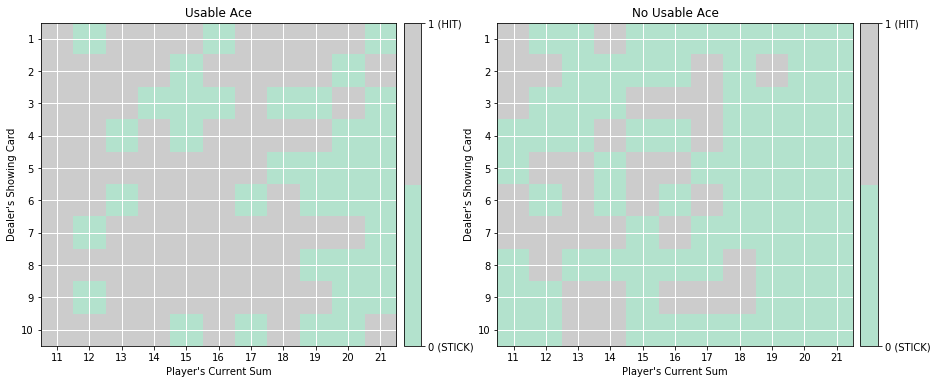

In [0]:
optimal_Q = greedy()
policy = dict((k,np.argmax(v)) for k, v in optimal_Q.items())
plot_utils.plot_policy(policy)